In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [2]:
header_flat=['pixel', 'intensity']
flatspec = pd.DataFrame(columns=header_flat)
#flat_files=["i_central_flat_order61_f4.txt","i_central_flat_order60_f4.txt","i_central_flat_order59_f4.txt"]
flat_files=["i_central_flat_order61_f4.txt"]


for filestring in flat_files:
        with open(filestring, 'r') as f:
            flatspec = flatspec.append(pd.read_csv(f,header=None,names=header_flat,delim_whitespace=True),ignore_index=True)

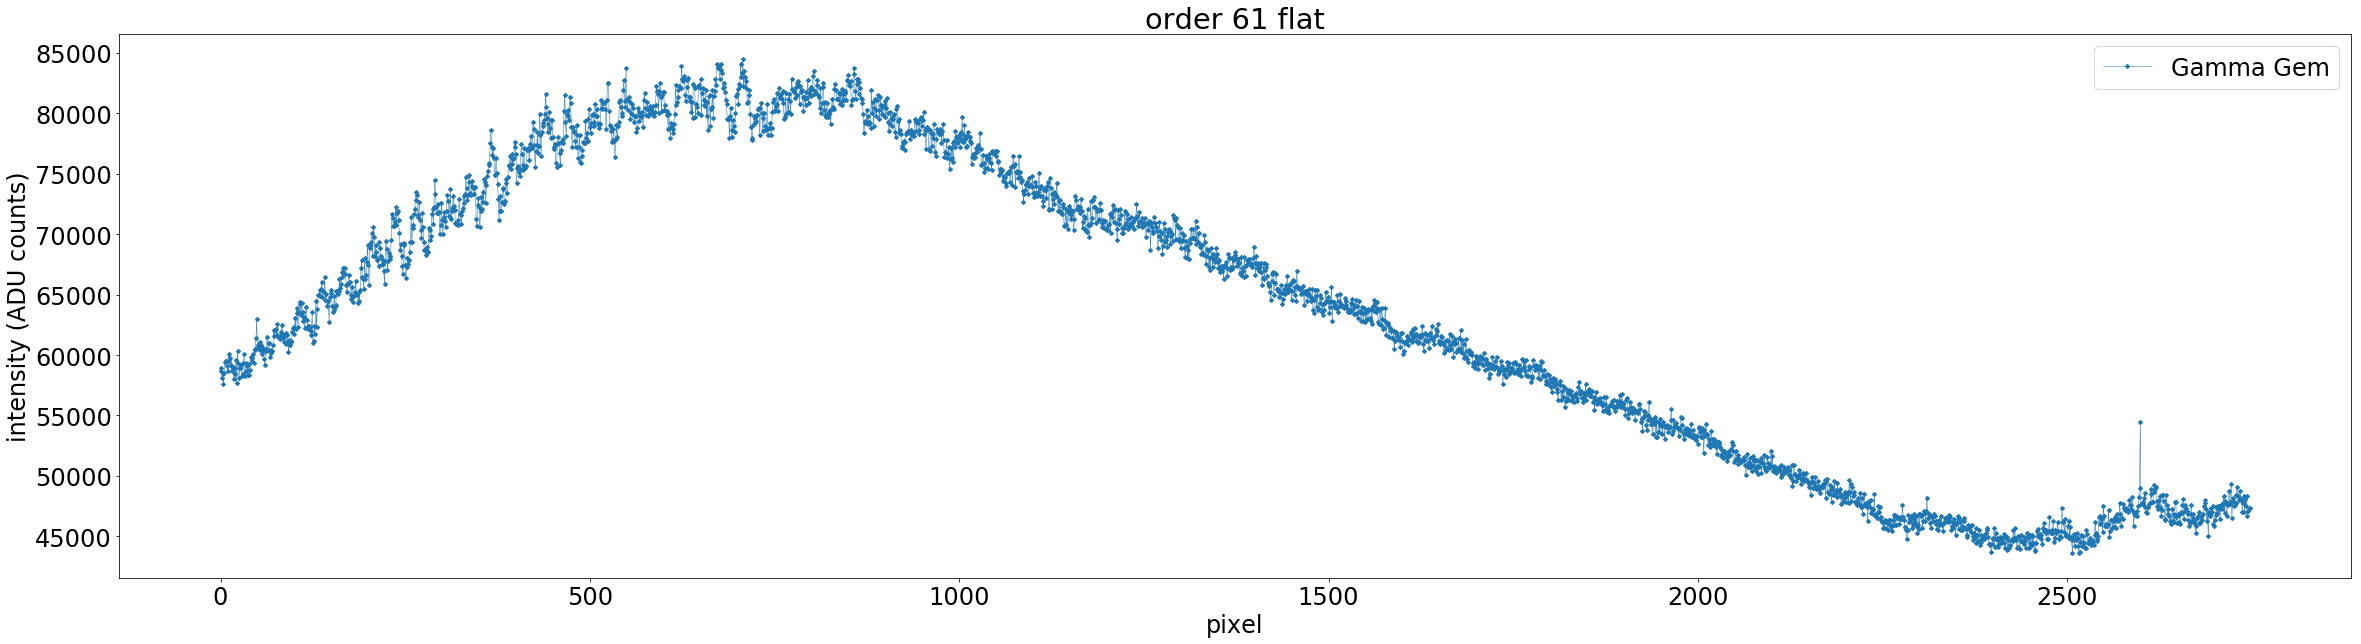

In [3]:
plt.figure(figsize=(40, 10)) 
plt.rc('font', size=24)
plt.title("order 61 flat")
#plt.scatter(spectra.wavelength*1000,spectra.intensity,marker='D',s=10,label="Gamma Gem")
plt.plot(flatspec.pixel,flatspec.intensity,marker='D',markersize=3,linewidth=0.5,linestyle=None,label="Gamma Gem")
plt.xlabel("pixel")
plt.ylabel("intensity (ADU counts)")
plt.legend()
#plt.show()
plt.savefig("gammagem_flat-order61.png", bbox_inches="tight")

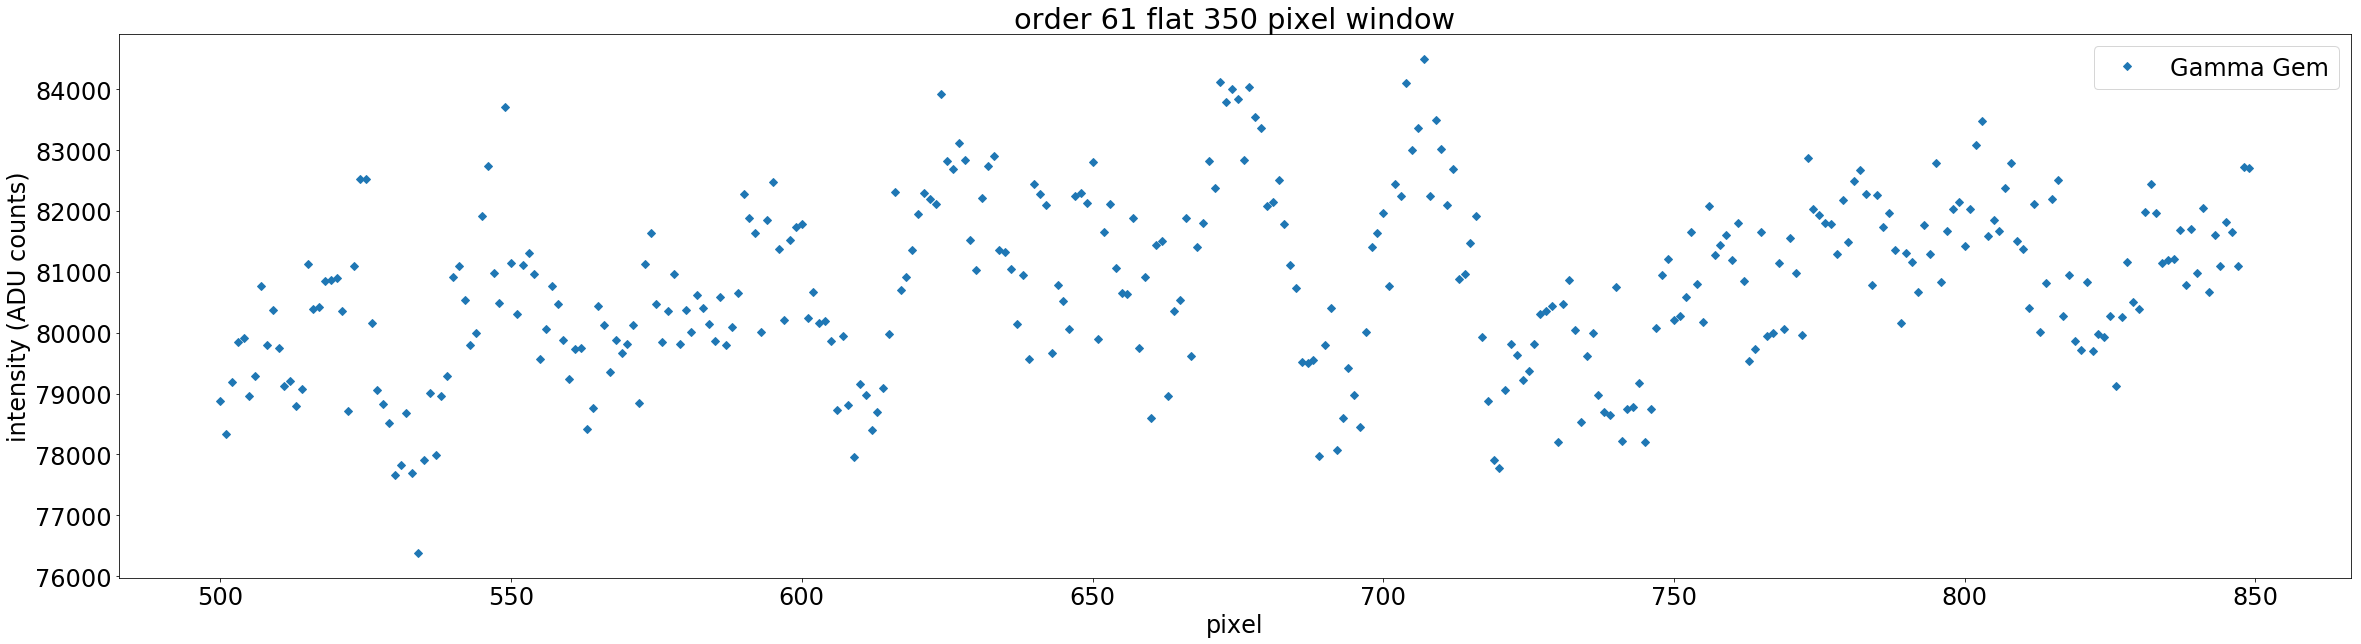

In [4]:
plt.figure(figsize=(40, 10)) 
plt.rc('font', size=24)
plt.title("order 61 flat 350 pixel window")
#plt.plot(flatspec.pixel[500:850]*1000,flatspec.intensity[500:850],marker='D',label="Gamma Gem")
plt.plot(flatspec.pixel[500:850],flatspec.intensity[500:850],marker='D',linewidth=0,label="Gamma Gem")
#plt.scatter(spectra.wavelength*1000,spectra.intensity,marker='D',linestyle=None,label="Gamma Gem")
plt.xlabel("pixel")
plt.ylabel("intensity (ADU counts)")
plt.legend()
#plt.show()
plt.savefig("gammagem_flat-zoom.png", bbox_inches="tight")

In [5]:
xrange=350
xstart=500
xend=xstart+xrange

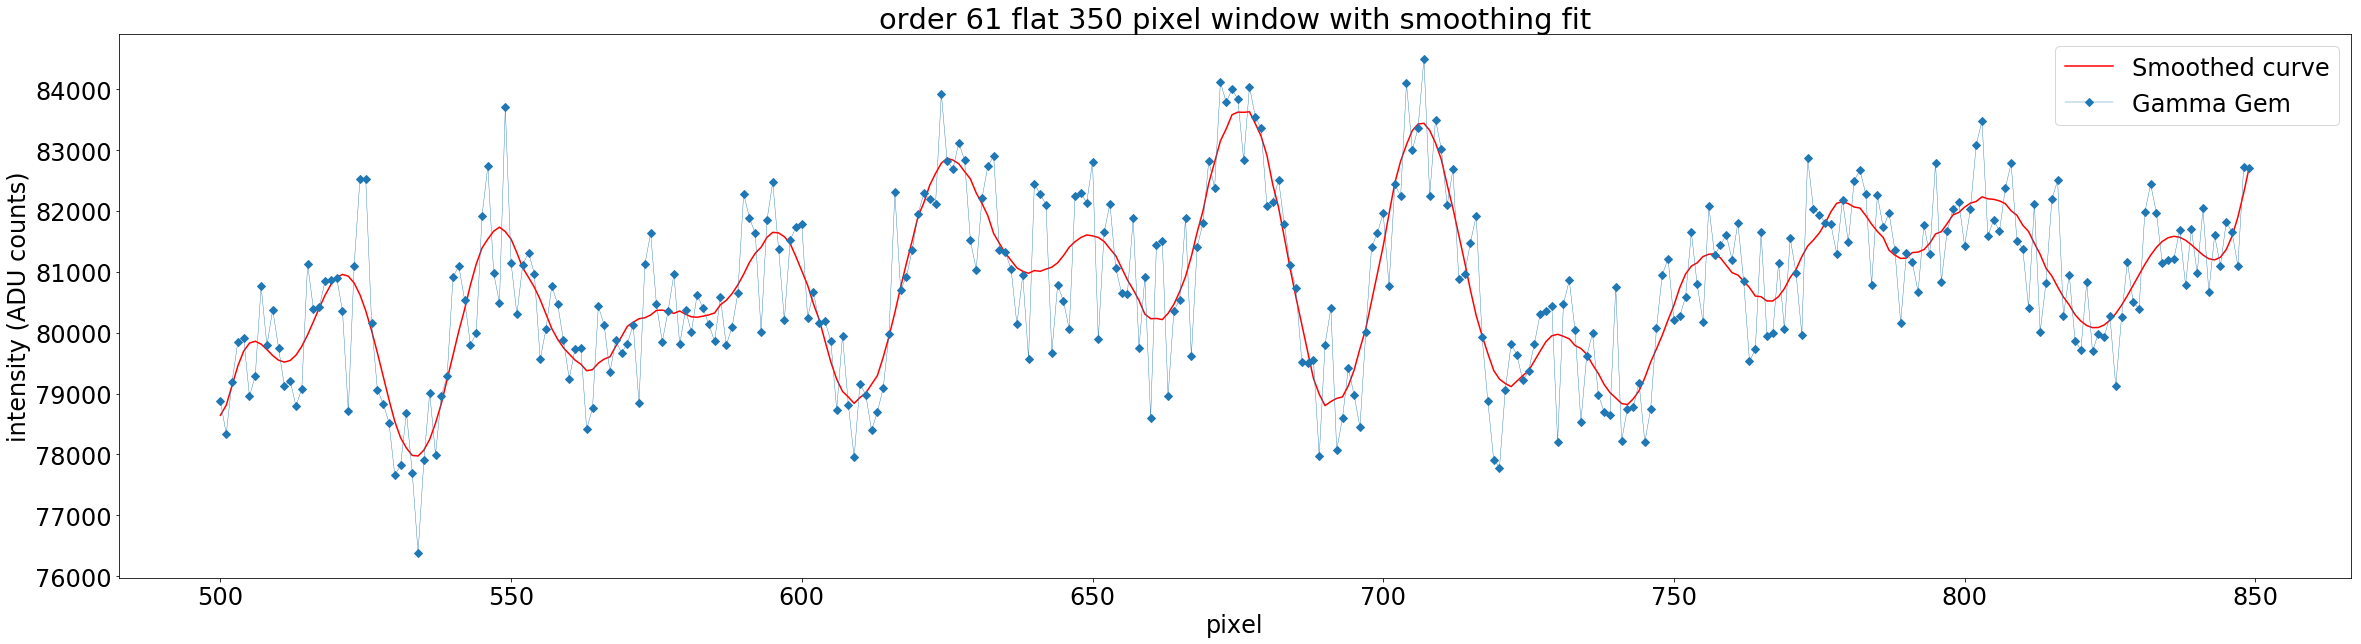

In [6]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

x = np.array(range(350))

xx = np.linspace(x.min(),x.max(), 350)

#print(xx)

itp = interp1d(xx,flatspec.intensity[500:850], kind='linear')

#adjust these parameters, window size and poly_order to change the fit

window_size, poly_order = 61, 9
yy_sg = savgol_filter(itp(xx), window_size, poly_order)

plt.figure(figsize=(40, 10))
#plt.plot(column_peaks_intensity)
plt.title("order 61 flat 350 pixel window with smoothing fit")
plt.plot(xx+500,yy_sg,'k', label= "Smoothed curve",color='red')
plt.plot(flatspec.pixel[500:850],flatspec.intensity[500:850],marker='D',linewidth=0.4,label="Gamma Gem")
plt.xlabel("pixel")
plt.ylabel("intensity (ADU counts)")
plt.legend()
plt.savefig("gammagem_flat-zoomfit.png", bbox_inches="tight")